# Gradient Descent

In [1]:
from linear_algebra import Vector, dot, add, scalar_multiply, distance

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return (dot(v, v))

In [2]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [3]:
def square(x: float) -> float:
    return (x * x)

def derivative(x: float) -> float:
    return (2 * x)

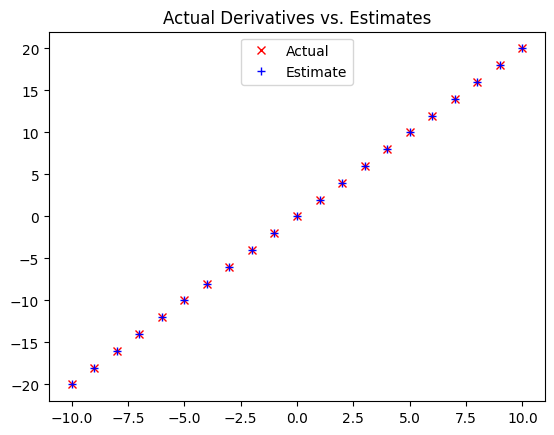

In [4]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]
# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [5]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)
    # add h to just the ith element of v
    for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [6]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
    for i in range(len(v))]

In [7]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return ([2 * v_i for v_i in v])

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    print(type(grad))
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, Vector([0, 0, 0])) < 0.001


<class 'list'>


AttributeError: 'float' object has no attribute 'components'